In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
df_f = pd.read_csv(r"D:\Study Materials\Python\Machine Learning\Fake news Detection Dataset\Fake.csv")
df_t = pd.read_csv(r"D:\Study Materials\Python\Machine Learning\Fake news Detection Dataset\True.csv")

In [3]:
df_f.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_t.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Assigning classes to dataset

In [5]:
df_f['class'] = 0
df_t['class'] = 1

### Checking number of rows and columns in Datasets

In [6]:
df_f.shape, df_t.shape

((23481, 5), (21417, 5))

### Manual Testing for Both Dataset
Remove the last 10 rows for testing

In [7]:
df_fm = df_f.tail(10)
for i in range(23480,23470 -1):
    df_f.drop([i], axis = 0, inplace = True)
    
df_tm = df_t.tail(10)
for i in range(21416,21406 -1):
    df_t.drop([i], axis = 0, inplace = True)

In [8]:
df_fm.shape , df_tm.shape

((10, 5), (10, 5))

In [9]:
df_f.shape, df_t.shape

((23481, 5), (21417, 5))

### Assigning classes to the Dataset

In [10]:
df_fm['class'] = 0
df_tm['class'] = 1

C:\Users\haris\AppData\Local\Temp\ipykernel_8684\25533195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fm['class'] = 0
C:\Users\haris\AppData\Local\Temp\ipykernel_8684\25533195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tm['class'] = 1


In [11]:
df_fm.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
df_tm.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
df_fm.shape , df_tm.shape

((10, 5), (10, 5))

### Merging Both the Dataset

In [14]:
data_merge = pd.concat([df_f, df_t], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [15]:
type(data_merge)

pandas.core.frame.DataFrame

In [16]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [17]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [18]:
type(data)

pandas.core.frame.DataFrame

In [88]:
data.head(0)

TypeError: NDFrame.head() takes from 1 to 2 positional arguments but 3 were given

In [91]:
print(data['text'][0])

lusaka  reuters    zambian president edgar lungu on friday called for unity among political groups ahead of talks between the government and the opposition aimed at reconciliation after a political crisis earlier this year  the leader of the opposition united party for national development  upnd   hakainde hichilema  was arrested with five others in april and charged with plotting to overthrow the government after his convoy failed to make way for lungu s motorcade  the case stoked political tensions in zambia  a major copper producer and seen as one of africa s more stable and functional democracies  following a bruising election last year  hichilema was freed from prison in august after the state dropped the charges  to pave the way for dialogue between the two sides following mediation by commonwealth secretary general patricia scotland   scotland s special envoy ibrahim gambari is in zambia and has separately held talks with lungu  hichilema and other opposition leaders  in an addr

In [20]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [21]:
data = data.sample(frac = 1)

In [22]:
data.head()

,text,class
19967,LUSAKA (Reuters) - Zambian President Edgar Lun...,1
8597,"PHILADELPHIA (Reuters) - Twelve years ago, Bar...",1
23182,21st Century Wire says Our weekly documentary ...,0
497,Donald Trump is very afraid of Special Counsel...,0
2344,In light of the Russian hacking scandal that i...,0


In [23]:
data.reset_index(inplace = True)
data.drop({'index'}, axis = 1, inplace = True)

In [24]:
data.columns

Index(['text', 'class'], dtype='object')

data.drop(['level_0'], axis = 1, inplace  = True)

In [25]:
data.columns

Index(['text', 'class'], dtype='object')

In [26]:
data.head()

,text,class
0,LUSAKA (Reuters) - Zambian President Edgar Lun...,1
1,"PHILADELPHIA (Reuters) - Twelve years ago, Bar...",1
2,21st Century Wire says Our weekly documentary ...,0
3,Donald Trump is very afraid of Special Counsel...,0
4,In light of the Russian hacking scandal that i...,0


### Create a function to clean the text 

In [27]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?]','', text)
    text = re.sub("\\W"," ", text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [28]:
data['text'] = data['text'].apply(wordopt)

### Applying Function to Text Column and Assigning X and Y

In [29]:
X = data['text']
y = data['class']

### Defining Training and Testing Data and Splitting Them Into &5 -25 Percent Ratio.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

### Converting Raw Data Into Matrix for Further Process.
Converting text to vector

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()

Xv_train = vectorization.fit_transform(X_train)
Xv_test = vectorization.transform(X_test)

In [43]:
Xv_train

<33673x95303 sparse matrix of type '<class 'numpy.float64'>'
	with 6899819 stored elements in Compressed Sparse Row format>

In [44]:
Xv_test

<11225x95303 sparse matrix of type '<class 'numpy.float64'>'
	with 2292007 stored elements in Compressed Sparse Row format>

### 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lgm = LogisticRegression()
lgm.fit(Xv_train, y_train)

LogisticRegression()

In [34]:
pred_lgm = lgm.predict(Xv_test)
lgm.score(Xv_test, y_test)

0.9848552338530067

In [35]:
print(classification_report(y_test, pred_lgm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5937
           1       0.98      0.99      0.98      5288

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



### 2. Decision Tree Classification

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(Xv_train, y_train)

DecisionTreeClassifier()

In [39]:
pred_dt = dt.predict(Xv_test)

In [41]:
dt.score(Xv_test,y_test)

0.9956347438752784

In [42]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5937
           1       1.00      0.99      1.00      5288

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



### 3. Random Forest Classification

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(Xv_train,y_train)

RandomForestClassifier()

In [47]:
pred_rf = rf.predict(Xv_test)
rf.score(Xv_test, y_test)

0.9877951002227171

In [49]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5937
           1       0.99      0.99      0.99      5288

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_rf)
cm

array([[5874,   63],
       [  74, 5214]], dtype=int64)

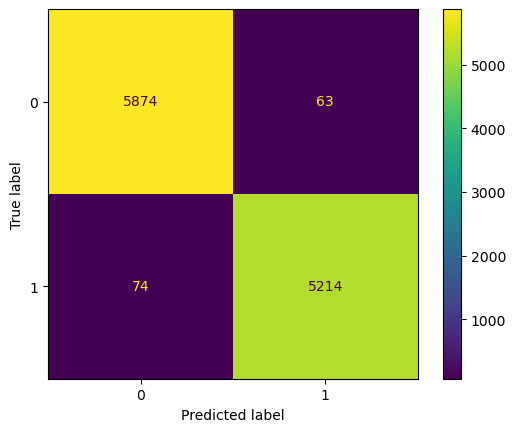

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                             display_labels = rf.classes_)
disp.plot()
plt.show()

### Naive Bayes Classification

Xv1_train = Xv_train.toarray()

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(Xv_train, y_train)

pred_nb = nb.predict(Xv_test)

nb.score(y_test, pred_nb)

### 4. Gradiant Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 0)
gb.fit(Xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [69]:
pred_gb = gb.predict(Xv_test)

In [70]:
gb.score(Xv_test, y_test)

0.9953674832962138

In [71]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5937
           1       0.99      1.00      1.00      5288

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not a Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordopt)
    new_x_test = new_def_test['text']
    new_xv_test = vectorization.transform(new_x_test)
    pred_lgm = lgm.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_gb = gb.predict(new_xv_test)
    pred_rf = rf.predict(new_xv_test)
    
    return print("\n\n LR Prediction:{} \n DT Prediction: {} \nGBC Prediction : {} \nRFC Prediction: {}".format(
        output_label(pred_lgm[0]), output_label(pred_dt[0]), output_label(pred_gb[0]), output_label(pred_rf[0])
    ))

news = str(input())
manual_testing(news)

In [86]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not a Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordopt)
    new_x_test = new_def_test['text']
    new_xv_test = vectorization.transform(new_x_test)
    pred_lgm = lgm.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_gb = gb.predict(new_xv_test)
    pred_rf = rf.predict(new_xv_test)
    
    return print("\n\n LR Prediction:{} \n DT Prediction: {} \nGBC Prediction : {} \nRFC Prediction: {}".format(
        output_label(pred_lgm[0]),
        output_label(pred_dt[0]),
        output_label(pred_gb[0]),
        output_label(pred_rf[0])))

news = str(input())
manual_testing(news)

Pakistan’s army on Thursday said it carried out precision strikes in Iran using killer drones, rockets, loitering munitions and stand-off weapons that struck “terrorist” groups Balochistan Liberation Army and the Balochistan Liberation Front.  At least nine people have been killed in the assault, said Reuters quoting Iranian media.  Pakistan’s army said maximum care was taken to avoid collateral damage and urged “dialogue and cooperation” in resolving issues between the two “brotherly countries”.  The strikes came two days after Iran’s missile and drone strikes in Pakistan’s Balochistan province.  “This morning Pakistan undertook a series of highly coordinated and specifically targeted precision military strikes against terrorist hideouts in Siestan-o-Baluchistan province of Iran,” the Ministry of Foreign Affairs said in a statement on Thursday. It said a number of terrorists were killed during the intelligence-based operation — codenamed “Marg Bar Sarmachar”.  In its statement, Pakist

Pakistan’s army on Thursday said it carried out precision strikes in Iran using killer drones, rockets, loitering munitions and stand-off weapons that struck “terrorist” groups Balochistan Liberation Army and the Balochistan Liberation Front.

At least nine people have been killed in the assault, said Reuters quoting Iranian media.

Pakistan’s army said maximum care was taken to avoid collateral damage and urged “dialogue and cooperation” in resolving issues between the two “brotherly countries”.

The strikes came two days after Iran’s missile and drone strikes in Pakistan’s Balochistan province.

“This morning Pakistan undertook a series of highly coordinated and specifically targeted precision military strikes against terrorist hideouts in Siestan-o-Baluchistan province of Iran,” the Ministry of Foreign Affairs said in a statement on Thursday. It said a number of terrorists were killed during the intelligence-based operation — codenamed “Marg Bar Sarmachar”.

In its statement, Pakistan said that it had previously shared “concerns about safe havens” with Iran but the latter failed to take action on the issue. “Over the last several years, in our engagements with Iran, Pakistan has consistently shared its serious concerns about the safe havens and sanctuaries enjoyed by Pakistani origin terrorists calling themselves Sarmachars on the ungoverned spaces inside Iran. Pakistan also shared multiple dossiers with concrete evidence of the presence and activities of these terrorists,” it said.

“However, because of lack of action on our serious concerns, these so-called Sarmachars continued to spill the blood of innocent Pakistanis with impunity. This morning’s action was taken in light of credible intelligence of impending large-scale terrorist activities by these so called Sarmachars,” Pakistan added.

“This action is a manifestation of Pakistan’s unflinching resolve to protect and defend its national security against all threats. The successful execution of this highly complex operation is also a testimony to the professionalism of the Pakistan Armed Forces,” said the statement, adding, “Pakistan will continue to take all necessary steps to preserve the safety and security of its people which is sacrosanct, inviolable and sacred.”

Iran summons Pak envoy
Iran’s Tasnim news agency said said that Pakistan’s chargé d’affaires in Iran was summoned “for an explanation regarding several explosions in different areas around the city of Saravan in Sistan and Balouchestan province.”

Meanwhile, Pakistan’s caretaker Prime Minister Anwaar-ul-haq Kakar will cut short a visit to the World Economic Forum in Davos and return home, a foreign ministry spokesperson said.

A Pakistani intelligence source told Reuters the strikes were carried out by military aircraft. “Our forces have conducted strikes to target Baloch militants inside Iran,” said the official in Islamabad, the Pakistani capital.

“The targeted militants belong to BLF,” he added, referring to the Baloch Liberation Front, which seeks independence for Pakistan’s Balochistan province.

Ties downgraded
Iran’s strikes had triggered a downgrading of ties between the two nations, with Pakistan’s Foreign Office spokesperson Mumtaz Zahra Baloch saying that the country reserved the right to retaliate against the attack.  Pakistan’s Foreign Minister Jalil Abbas Jilani has also told his Iranian counterpart Hossein Amir Abdollahian that the attack had seriously damaged the ties between the two nations.

“Pakistan has decided to recall its ambassador from Iran and that the Iranian ambassador to Pakistan who is currently visiting Iran may not return for the time being,” she said, as per a report in the Pakistani daily Dawn.

The Iranian strikes on Tuesday night had reportedly targeted two bases of the Balochi militant group Jaish al Adl in Pakistan’s border town of Panjgur in Balochistan province.
